<a href="https://colab.research.google.com/github/NatasaRad/Projekat_PPPO/blob/main/projekat_pppo_IT12_2020_NatasaRad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Predmet: Principi prezentacije i prepoznavanja oblika

Student: Nataša Rad IT 12/2020

Tema projektnog zadatka: Dog Breed Classification

# **UVOD**

**Mašinsko učenje** (*Machine learning*) je grana veštačke inteligencije (*Artificial Intelligence*) koja se fokusira na razvoj modela i algoritama koji omogućavaju računarima da uče iz podataka i da se poboljšaju iz prethodnog iskustva, bez eksplicitnog programiranja za svaki zadatak. [1]


**Glavne vrste** mašinskog učenja: [1]

1. Nadgledano učenje (*Supervised Machine Learning*)

2. Nenadgledano učenje (*Unsupervised Machine Learning*)

3. Polu-nadgledano učenje (*Semi-Supervised Machine Learning*)

4. Pojačano učenje (*Reinforcement Learning*)




**Nadgledano** mašinsko učenje podrazumeva obučavanje modela za označeni skup podataka. Označeni skupovi podataka imaju i ulazne i izlazne parametre. Algoritmi za nagledano mašinsko učenje podrazumevaju učenje mapiranja ulaznih vrednosti na ispravne izlazne vrednosti. Nadgledano učenje ima označene skupove podataka za trening i validaciju. [1]

**Nenadgledano** mašinsko učenje podrazumeva algoritme koji otkrivaju obrasce koristeći neoznačene podatke. Za razliku od nadgledanog učenja, nenadgledano učenje ne uključuje obezbeđivanje algoritama sa označenim ciljnim rezultatima. Primarni cilj nenagledanog učenja je otkrivanje skrivenih obrazaca, sličnosti ili klastera unutar podataka, koji se zatim mogu koristiti u svrhe kao što je istraživanje podataka. [1]

**Polu-nadgledano** mašinsko učenje koristi i označene i neoznačene podatke. Posebno je korisno kada je dobijanje označenih podataka skupo, dugotrajno ili zahteva puno resursa. Koristi se kada označeni podaci zahtevaju veštine i relevantne resurse kako bi se obučili. [1]

**Pojačano** mašinsko učenje je metoda učenja koja stupa u interakciju sa okruženjem tako što proizvodi akcije i otkriva greške. Pokušaj, greška i kašnjenje su najrelevantnije karakteristike pojačanog mašinskog učenja. [1]

Tema ovog projektnog zadatka jeste **klasifikacija**.
Klasifikacija predstavlja jednu od dve glavne kategorije nadgledanog mašinskog učenja i bavi se predviđanjem kategoričkih varijabli, koje predstavljaju diskretne klase ili oznake. Klasifikacioni algoritmi uče da mapiraju ulazne karakteristike u jednu od unapred definisanih klasa.
Kada se mašinsko učenje koristi za klasifikovanje slika, računar može automatski da klasifikuje ulazne slike. Primeri klasifikacije slika su označavanje rendgenskog snimka kao rak ili ne, ili klasifikacija rukom pisane cifre. [1] [2]

# **POTREBNE BIBLIOTEKE**

1. Torch
2. TensorFlow
3. Matplotlib
4. Numpy

**Torch** je biblioteka otvorenog koda za mašinsko učenje. Pruža širok spektar algoritama za duboko učenje (*deep learning*). Torch je poznat po jednostavnosti, fleksibilnosti i efikasnim performansama. [3]

**TensorFlow** je biblioteka otvorenog koda za mašinsko učenje koju je razvio Google. Koristi se za izgradnju i obuku modela dubokog učenja (*deep learning*) jer olakšava kreiranje računarskih grafikona i efikasno izvršenje na različitim hardverskim platformama. [4]

**Matplotlib** je popularna biblioteka za crtanje u *Python-u*. Koristi se za kreiranje visokokvalitetnih vizualizacija i grafikona. Nudi različite alate za generisanje različitih tipova dijagrama, olakšavajući analizu podataka i prezentaciju. Ova biblioteka takođe podržava trodimenzionalno crtanje. [5]

**Numpy** je osnovni paket za naučno računarstvo u *Python-u*. Obezbeđuje višedimenzionalni niz objekata kao i rutine za obavljanje brzih operacija nad nizovima, uključujući matematičku i logičku manipulaciju oblikom, sortiranje, selekciju, linearnu algebru, osnovne statističke operacije itd. [6]

Sledeća ćelija koda predstavlja **importovanje** prethodno opisanih **biblioteka** koje su neophodne za rad sa **neuronskim mrežama**, odnosno *deep learning*.

In [ ]:
import torch
from torchvision import models, transforms
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG19, ResNet101
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# **DATASET**

Za realizaciju ovog projektnog zadatka korišćen je *dataset* koji se sastoji od foldera slika različitih rasa pasa. Cilj projekta jeste izvršiti njihovu **klasifikaciju**, odnosno klasifikovati psa u rasu kojoj pripada. *Dataset* se sastoji od 6 foldera, ti folderi predstavljaju rase pasa a to su:
1. Norwegian_elkhound
2. Ibizian_hound
3. Gordon_setter
4. Dandie_Dinmont
5. Bernese_mountain_dog
6. Bedlington_terrier

# **PRETPROCESIRANJE PODATAKA**

Pre nego što pređemo na obučavanje modela dubokog učenja, podatke je potrebno pripremiti tj. obraditi. Obrada se izvršava kroz sledeće korake:

1. **Normalizacija podataka** - podrazumeva promenu vrednosti piksela na slikama, menjamo vrednosti piksela iz opsega 0-255 u opseg 0-1, ubrzavajući na ovaj način proces treninga podataka i smanjujući šansu za preopterećenje. Normalizacija podataka se vrši uz pomoć *ImageDataGenerator* klase.

2. **Promena veličine slika** - neophodna je jer ulazni sloj neuronske mreže očekuje sve slike iste veličine. Menjamo veličinu slika na veličinu od 256x256 pix.

3. **Podela skupa podataka** - delimo skup podataka na podskup za trening i podskup za validaciju. 80% podataka je namenjeno za trening a 20% podataka za validaciju. ***Trening podaci*** se koriste za obuku modela tokom koje on uči da prepozna obrasce, karakteristike i odnose ulaznih podataka i odgovarajućih izlaza. ***Validacioni podaci*** se koriste za procenu performansi modela tokom obuke. Omogućavaju da se proceni koliko će model biti efikasan na novim, neviđenim podacima.

4. **Kategoričke oznake** - class_mode se u naredno prikazanoj metodi postavlja na "**categorical**", što znači da se koristi višeklasna klasifikacija odnosno, svaka slika može pripadati jednoj od više klasa.

Sledeća ćelija koda predstavlja definisanje metode ***preprocess_data*** za pretprocesiranje podataka, koja će biti pozvana u sekciji "*UČITAVANJE DATASET-A*".

In [ ]:
def preprocess_data(data_dir, img_size=(256, 256), batch_size=32):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

    return train_generator, validation_generator

# **MODEL DUBOKOG UČENJA**

Kako bismo izgradili tj. kreirali model dubokog učenja potrebno je da definišemo njegovu **arhitekturu** i potrebno je **kompaliranje** modela.

Što se tiče **arhitekture**, koristi se **osnovni model** koji može, u ovom slučaju, biti **VGG19** ili **ResNet101**, zajedno sa globalnim prosečnim objedinjavanjem i gustim slojevima.
  1. **globalni prosečni sloj objedinjavanja** - pojednostavljuje izlaz osnovnog modela
  2. **gusti slojevi** - koriste se za klasifikaciju

Što se tiče **izlaznog sloja**, on koristi funkciju ***softmax***, sa brojem jedinica jednakih broju klasa, odnosno 6. ***Softmax*** se koristi za probleme klasifikacije više klasa.

Što se tiče **kompajliranja**, model se izgrađuje korišćenjem **Adam optimizatora**, sa stopom učenja od 0.0001. **Funkcija gubitka** koja se koristi je ***categorical_crossentropy***, koja se inače koristi za probleme klasifikacije više klasa. I veoma važno, prati se **metrika tačnosti** kako bismo mogli proceniti model.

Sledeća ćelija koda predstavlja definisanje metode ***build_model*** za kreiranje modela dubokog učenja, koja će biti pozvana u sekciji "*KREIRANJE I OBUKA VGG19 I RESNET101 MODELA*".

In [ ]:
def build_model(base_model, num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# **UČITAVANJE DATASET-A**

 Sledeća ćelija koda predstavlja povezivanje *Google Colab-a* sa *drive-om* na kom se nalazi *dataset*, koje je neophodno kako bismo mogli učitati podatke, odnosno taj *dataset*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sledeća ćelija koda predstavlja nekoliko varijabli i setovanje njihovih vrednosti, a to su:

***data_dir*** - sadrži putanju do direktorijuma u kom se nalazi *dataset*, u ovom slučaju naziv tog direktorijuma na mom *drive-u* je "**data**"

***num_classes*** - broj klasa u *dataset-u*, s obzirom da se u dataset-u nalazi 6 različitih foldera, ovoj varijabli je dodeljena vrednost 6

***train_gen*** i ***val_gen*** - objekti generatora kreirani od strane *preprocess_data* metode
  1. *train_gen* - generator za trening podatke
  2. *val_gen* - generator za validacione podatke

**Parametri:**

**batch_size** - vrednost ovog parametra predstavlja broj primeraka za trening koji će biti obrađeni u svakoj iteraciji (*mini-batch*)

**image_size** - ovaj parametar određuje željenu veličinu za ulazne slike tokom pretprocesiranja podataka

In [ ]:
data_dir = '/content/drive/MyDrive/data'
num_classes = 6
train_gen, val_gen = preprocess_data(data_dir, img_size=(256, 256), batch_size=32)

Found 603 images belonging to 6 classes.
Found 149 images belonging to 6 classes.


# **PRIKAZ UČITANIH PODATAKA**

Sledeća ćelija koda predstavlja definiciju metode ***plot_images***. Ovu metodu koristimo da bismo proverili učitavanje podataka, gde ***image_arr*** predstavlja **slike** koje je potrebno prikazati, kreira se ***subplot*** sa jedinim redom i šest kolona, vrši se izravnavanje osa iz 2D niza u 1D niz, kreira se ***for*** petlja koja iterira kroz ***images_arr*** i ***axes***. Na kraju se sređuje ***layout***, odnosno prikaz datog ***plot-a*** i on se prikazuje. **Slike iz skupa za trening** se smeštaju u ***sample_training_images***. Prikazaćemo šest slika iz učitanog *dataseta-a*.





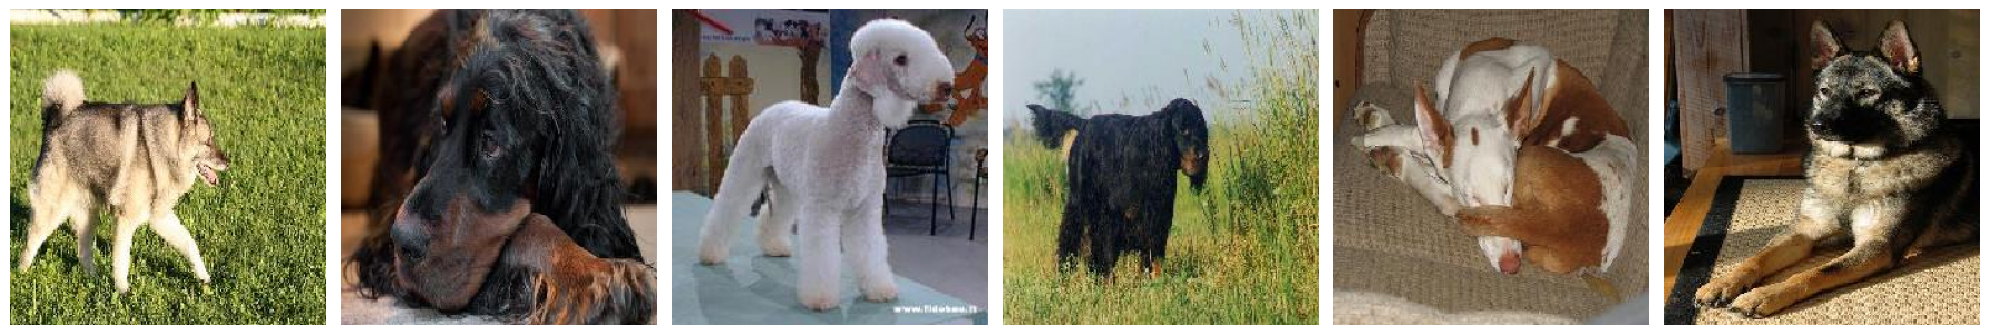

In [ ]:
def plot_images(images_arr, class_names):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_gen)
plot_images(sample_training_images[:6], class_names=train_gen.class_indices)

# **DISTRIBUCIJA KLASA**

Ključan korak u korišćenom skupu podataka jeste određivanje i razumevanje distribucije klasa. Potrebno je odrediti da li je **distribucija klasa** **ravnomerna** ili **neravnomerna**. Ukoliko je distribucija ravnomerna, možemo zaključiti da model dobro radi, ukoliko nije, može se desiti da model ima dobre rezultate na nekim klasama, a lošije na nekim drugim klasama.

Da bismo utvrdili kakva je distribucija klasa u ovom *dataset-u*, uradićemo sledeće:

1. Broj slika po klasi - računamo broj slika za svaku klasu u trening set-u. Na osnovu ovoga znaćemo koliko je skup podataka **balansiran** ili **nebalansiran**.

2. Barplot za distribuciju - pomoću *barplot-a* vizuelno prikazujemo broj slika po klasi. Na ovaj način možemo brzo zaključiti da li je neka **klasa** **nedovoljno** ili **previše** **zastupljena** u **skupu podataka**.

Sledeća ćelija koda predstavlja definisanje ***barplot-a*** za prikazivanje **distribucije klasa**. Pre svega, potrebno je importovati "*os*" koji omogućava da se koriste funkcionalnosti koje su zavisne od operativnog sistema, kao što je u ovom slučaju čitanje strukture direktorijuma tj. foldera. Zatim se inicijalizuje prazna lista (***numberOfPictures***), ***for*** petlja koja iterira kroz direktorijum na zadatoj putanji i podešavaju se ostale vrednosti. Na kraju sledi setovanje određenih parametara datog ***plot-a***.



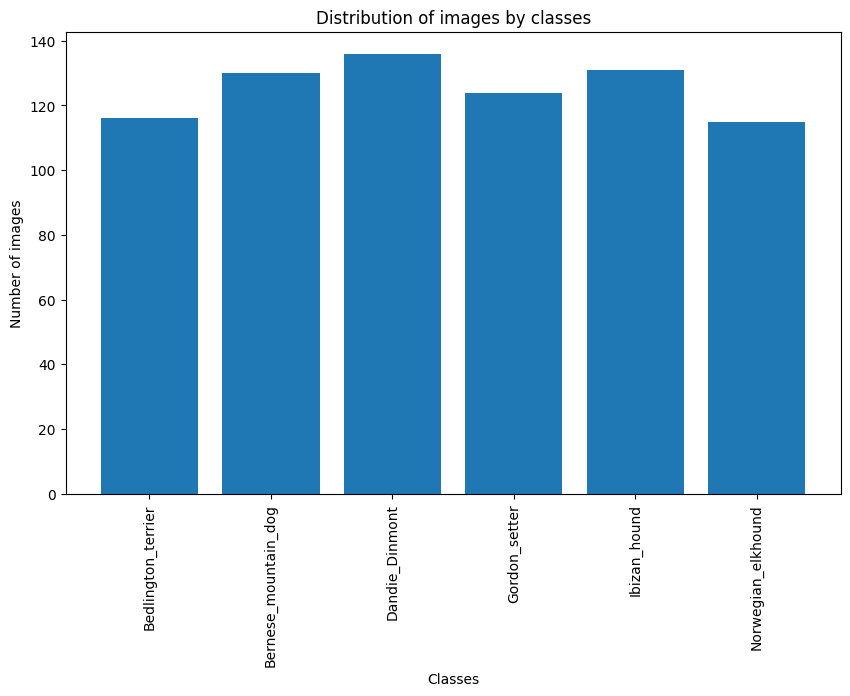

In [ ]:
import os

numberofPictures = list()
count = 0
for root_dir, cur_dir, files in os.walk(r'/content/drive/MyDrive/data'):
    count = len(files)
    numberofPictures.append(count)

numberofPictures.pop(0)
class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(10, 6))
plt.bar(class_names, numberofPictures)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=90)
plt.title('Distribution of images by classes')
plt.show()

Na osnovu *barplot-a* možemo zaključiti da je distribucija uravnotežena, odnosno da je približno isti broj slika po klasi. *Dataset* je **balansiran**.

# **ODABRANI MODELI**

Postoje brojni modeli dubokog učenja koji se mogu koristiti za zadatke klasifikacije. Izbor modela zavisi od specifičnih zahteva problema, kao što su veličina *dataset-a*, složenost obrasca koji treba da se nauči i raspoloživost računarskih resursa.

U ovom projektnom zadatku biće korišćeni sledeći modeli:
1. VGG19
2. ResNet101

**VGG19** (*Visual Geometry Group*) model je odabran za ovaj projekat zbog jednostavnosti, odnosno njegovu arhitekturu je lako razumeti, dok je i dalje veoma sposoban da shvati složene karakteristike i obrasce u podacima (efikasnost).

**ResNet101** (*Residual Network*) model je odabran za ovaj projekat jer je efikasan za klasifikaciju slika zbog svoje duboke arhitekture sa 101 slojem neuronske mreže.

# **KREIRANJE I OBUKA VGG19 I RESNET101 MODELA**

Sledeća ćelija koda predstavlja kreiranje VGG19 modela (poziva se metoda ***build_model*** koja je prethodno definisana  u sekciji "*MODEL DUBOKOG UČENJA*"), zatim kreiranje ResNet101 modela, povratne pozive i na kraju obuku tj. trening oba modela.

Modifikacije - ***include_top*** se postavlja na **false**, da bismo prilagodili izlazni sloj za specificiran broj klasa i ***trainable*** na **false**, što označava da su prethodno obučeni slojevi modela postavljeni kao neobučeni, da bi naučene karakteristike sa *ImageNet-a* ostale netaknute. Modifikacije su primenjene za izgradnju i VGG19 modela i ResNet101 modela.

Povratni pozivi - omogućavaju da sačuvamo najbolju verziju svakog modela na osnovu preciznosti validacije i da održimo model na najboljim performansama tokom treninga.

In [ ]:
# Kreiranje VGG19 modela
base_model_vgg = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_vgg.trainable = False
model_vgg = build_model(base_model_vgg, num_classes)

# Kreiranje ResNet101 modela
base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model_resnet.trainable = False
model_resnet = build_model(base_model_resnet, num_classes)

# Povratni pozivi
checkpoint_vgg = ModelCheckpoint('vgg_best_model.keras', monitor='val_accuracy', save_best_only=True)
checkpoint_resnet = ModelCheckpoint('resnet_best_model.keras', monitor='val_accuracy', save_best_only=True)

# Trening VGG19 i ResNet101 modela
history_vgg = model_vgg.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint_vgg])
history_resnet = model_resnet.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint_resnet])

80134624/80134624 [==============================] - 0s 0us/step


171446536/171446536 [==============================] - 2s 0us/step


Epoch 1/8
19/19 [==============================] - 956s 50s/step - loss: 1.7678 - accuracy: 0.2471 - val_loss: 1.6001 - val_accuracy: 0.4027
Epoch 2/8
19/19 [==============================] - 829s 44s/step - loss: 1.4499 - accuracy: 0.5290 - val_loss: 1.3995 - val_accuracy: 0.5638
Epoch 3/8
19/19 [==============================] - 815s 43s/step - loss: 1.2421 - accuracy: 0.5987 - val_loss: 1.3244 - val_accuracy: 0.4899
Epoch 4/8
19/19 [==============================] - 846s 46s/step - loss: 1.1231 - accuracy: 0.6235 - val_loss: 1.2366 - val_accuracy: 0.5436
Epoch 5/8
19/19 [==============================] - 846s 45s/step - loss: 1.0032 - accuracy: 0.6915 - val_loss: 1.0652 - val_accuracy: 0.6309
Epoch 6/8
19/19 [==============================] - 776s 41s/step - loss: 0.8795 - accuracy: 0.7413 - val_loss: 0.9892 - val_accuracy: 0.6376
Epoch 7/8
19/19 [==============================] - 832s 44s/step - loss: 0.7835 - accuracy: 0.7778 - val_loss: 0.9818 - val_accuracy: 0.6242
Epoch 8/8
19/

Sledeće dve ćelije koda prikazuju poziv metode ***summary*** za kreirane VGG i ResNet modele. Ova metoda ispisuje rezime arhitekture i parametara kreiranog modela. Gde, između ostalog, možemo videti **ukupan broj parametara u modelu**, **broj parametra koji su predmet obuke tokom obuke modela** i **broj parametra koji nisu predmet obuke**. Kao i to da su oba modela **sekvencijalna**, što znači da se sastoje od linearnog niza slojeva, koji uključuju **konvolucionu bazu VGG19/ResNet101**, sloj **GlobalAveragePooling2D** i dva **Dense** (gusta) sloja.

In [ ]:
#summary za VGG model
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 20555846 (78.41 MB)
Trainable params: 531462 (2.03 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
#summary za ResNet model
model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 44762502 (170.76 MB)
Trainable params: 2104326 (8.03 MB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


# **POREĐENJE PRECIZNOSTI VGG19 I RESNET101 MODELA**

Za procenu perfomansi modela i njihovo poređenje potrebno je da pogledamo njihovu **istoriju treninga**. Na osnovu istorije treninga možemo videti koliko dobro modeli uče tokom treninga. Grafički, uz pomoć metode ***plot_history***, koja je definisana a zatim pozvana za istoriju treninga oba modela u sledećoj ćeliji koda, ćemo prikazati **preciznost** i **gubitak** oba modela.

Sledeći kod predstavlja definisanje metode ***plot_history***, koja se koristi za grafičko prikazivanje preciznosti modela. U poslednjoj liniji koda metodi se kao argumenti prosleđuju istorija treninga oba modela i string za ispis.

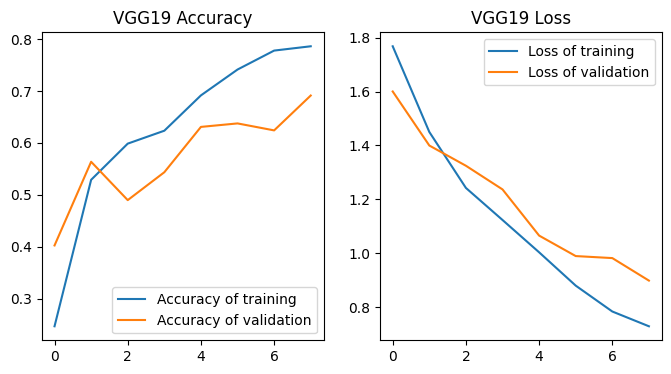

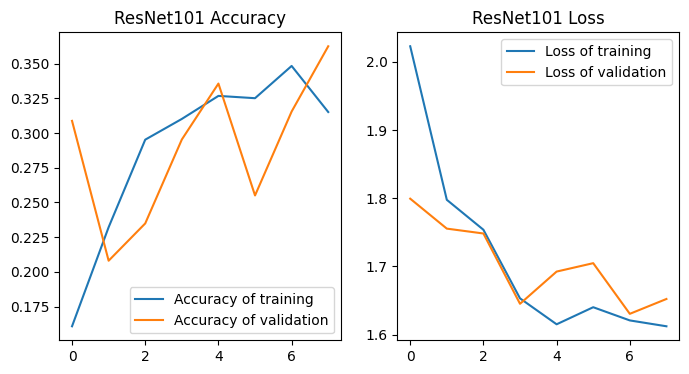

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy of training')
    plt.plot(history.history['val_accuracy'], label='Accuracy of validation')
    plt.title(title + ' Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss of training')
    plt.plot(history.history['val_loss'], label='Loss of validation')
    plt.title(title + ' Loss')
    plt.legend()

    plt.show()


plot_history(history_vgg, 'VGG19')
plot_history(history_resnet, 'ResNet101')

**Gubitak** (*loss*) - meri koliko su tačne predikcije modela u odnosu na stvarne vrednosti

**Preciznost** (*accuracy*) - procenat tačno klasifikovanih uzoraka

Dobijeni rezultati pomažu u proceni performansi modela na validacionom skupu podataka.

Detaljnije komentarisanje **poređenja preciznosti** modela VGG19 i ResNet101 je u sekciji "*ZAKLJUČAK*".

# **DEMONSTRACIJA RADA MODELA**

Za demonstriranje rada modela, odabran je model VGG, kako je primećeno, kroz **epohe** u sekciji "*KREIRANJE I OBUKA VGG 19 I RESNET101 MODELA*", da je on precizniji od ResNet101 modela. Sledeća ćelija koda predstavlja definiciju metode ***predictions***, koja koristi prethodno istrenirani **VGG** model i kao parametar prima **sliku** a kao povratnu vrednost vraća **predikciju**, odnosno **klasu** kojoj data slika pripada. Potrebno je učitati željenu sliku, zatim konvertovati sliku u ***NumPy*** niz, odnosno format koji model može da razume. Parametar ***preds*** čuva listu verovatnoća za svaku klasu. Zatim ***for*** petlja iterira kroz te verovatnoće, a prekida se onda kada naiđe na prvu **nenula** verovatnoću. Varijabla ***classes*** čuva nazive klasa dobijene na osnovu indeksa iz ***train_gen***. Na kraju se ispisuje predikcija, gde ***classes[ind]*** ispisuje naziv klase sa tim indeksom.

In [ ]:
from keras.preprocessing import image

def predictions(img_path):
  #img = image.load_img(img_path,target_size=(256,256))
  img = Image.open(img_path).resize((256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = list(model_vgg.predict(x))

  ind = 0

  for i in range (1,len(preds[0])):
    if preds[0][i] != 0:
      ind = i
      break;

  classes = list(train_gen.class_indices.keys())

  return print("PREDICTION (CLASS) IS: " + classes[ind])

Sledećih šest ćelija koda prikazuju konkretan poziv metode ***predictions*** kojoj prosleđujemo sliku koju **model do tad nije** **video**, odnosno koja se ne nalazi u datom *dataset-u*. Slike od 1 do 6 su zapravo slike različitih rasa pasa, odnosno obuhvaćene su sve moguće rase pasa koje je model naučio da **klasifikuje**, sa određenim procentom tačnosti. Ovo nam omogućava da zaključimo i vidimo na primerima kako model radi.

1/1 [==============================] - 1s 1s/step
PREDICTION (CLASS) IS: Bernese_mountain_dog


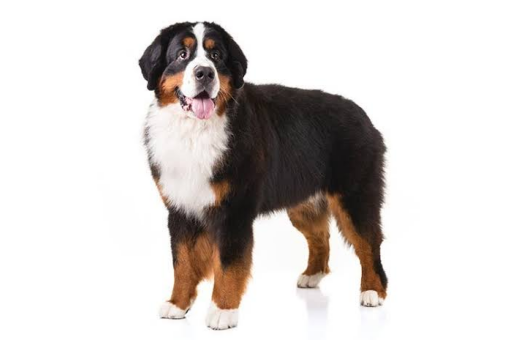

In [ ]:
predictions("/content/drive/MyDrive/test/imggg1.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg1.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

1/1 [==============================] - 1s 882ms/step
PREDICTION (CLASS) IS: Ibizan_hound


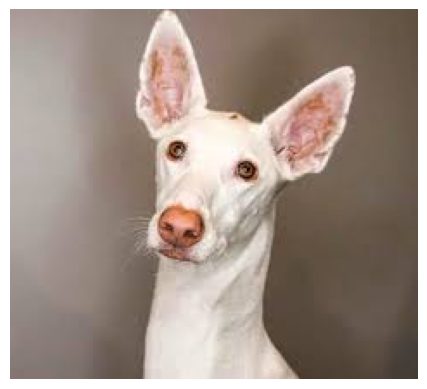

In [ ]:
predictions("/content/drive/MyDrive/test/imggg3.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg3.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

1/1 [==============================] - 1s 892ms/step
PREDICTION (CLASS) IS: Dandie_Dinmont


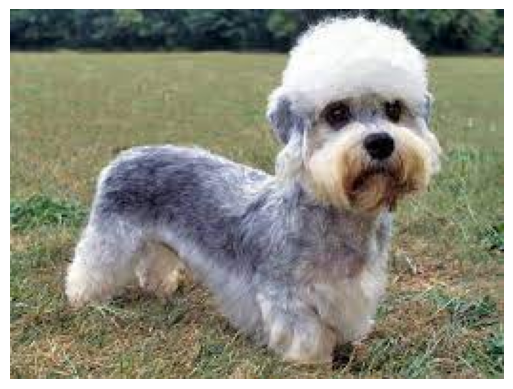

In [ ]:
predictions("/content/drive/MyDrive/test/imggg5.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg5.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

1/1 [==============================] - 2s 2s/step
PREDICTION (CLASS) IS: Norwegian_elkhound


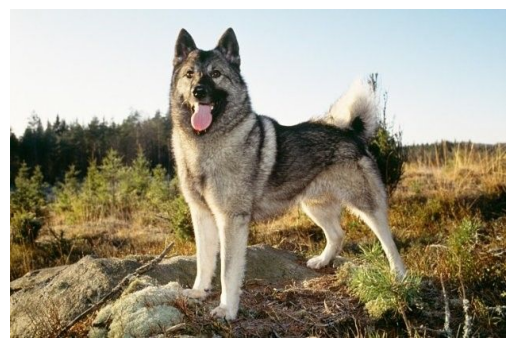

In [ ]:
predictions("/content/drive/MyDrive/test/imggg2.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg2.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

1/1 [==============================] - 1s 889ms/step
PREDICTION (CLASS) IS: Dandie_Dinmont


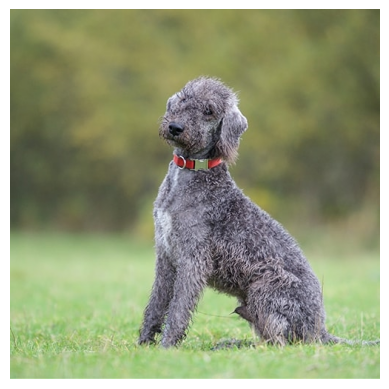

In [ ]:
predictions("/content/drive/MyDrive/test/imggg6.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg6.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

1/1 [==============================] - 1s 880ms/step
PREDICTION (CLASS) IS: Bernese_mountain_dog


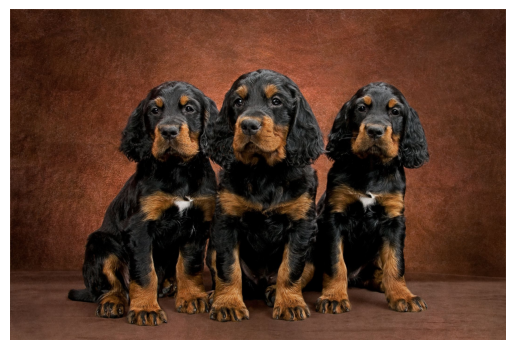

In [ ]:
predictions("/content/drive/MyDrive/test/imggg4.jpg")
image = mpimg.imread("/content/drive/MyDrive/test/imggg4.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

Kao što se može uočiti, prve četiri slike je model dobro klasifikovao u rasu kojoj pripadaju, dok poslednje dve slike nije dobro klasifikovao. Odnosno, rasu ***Bedlington_terrier*** je klasifikovao kao rasu ***Dandie_Dinmont***, a rasu ***Gordon_setter*** je klasifikovao kao rasu ***Bernese_mountain_dog***. Možemo uočiti i to da su klase ***Bedlington_terrier*** i ***Dandie_Dinmont*** na pogled slične, što isto važi i za klase ***Gordon_setter*** i ***Bernese_mountain_dog***. Ovaj procenat preciznosti modela VGG19 je u skladu sa procentom preciznosti koji se mogao učiti prilikom obuke ovog modela kroz epohe.

# **ZAKLJUČAK**

Celokupan proces rada bio je zahtevan, zbog velike potrebe za istraživanjem i analizom kao i sređivanjem dobijenog dataseta. Izvršena je podela *dataset-a* na **trening** podatke i **validacione** podatke.

Preciznost modela se meri njegovom tačnošću nad određenim skupom podataka, tj. *dataset-om*. I VGG19 i ResNet101 su moćne arhitekture konvolucionih neuronskih mreža (*CNN*), ali njihove performanse mogu zavisiti od specifičnih karakteristika skupa podataka.

 Oba modela su istrenirana u 8 epoha, što je zahtevalo dosta vremena i resursa. Sa povećanjem broja epoha povećala bi se i preciznost modela, međutim iz urađenog možemo zaključiti da je ResNet101 model lošiji od VGG19 modela, odnosno da VGG19 daje bolje rezultate.

# **REFERENCE**

[1] https://www.geeksforgeeks.org/types-of-machine-learning/

[2] https://yannawut.medium.com/image-classification-for-beginner-a6de7a69bc78#:~:text=Image%20Classification%20for%20beginner%201%20Step%201%3A%20Reading,...%206%20Step%206%3A%20Model%20evaluation%201.%20


[3] https://deepai.org/machine-learning-glossary-and-terms/torch

[4] https://www.geeksforgeeks.org/introduction-to-tensorflow/

[5] https://www.analyticsvidhya.com/blog/2021/10/introduction-to-matplotlib-using-python-for-beginners/

[6] https://numpy.org/doc/stable/